# Logistic Regression ‚Äî Titanic Survival Prediction

**Objective:** Build and evaluate a logistic regression model to predict passenger survival on the Titanic. This notebook follows a reproducible workflow: EDA ‚Üí preprocessing ‚Üí modeling ‚Üí evaluation ‚Üí interpretation ‚Üí export & deployment (Streamlit).

## 0. Setup & Imports
Import libraries and set display preferences.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, roc_curve, classification_report)
import joblib

sns.set(style='whitegrid')
print('Imports complete')

Imports complete


## 1. Load Data
Load `Titanic_train.csv` and `Titanic_test.csv` (the latter can be used for final predictions).

In [5]:
from pathlib import Path
p_train = Path('Titanic_train.csv')
if not p_train.exists():
    p_train = Path(r'D:/DATA-SCIENCE/ASSIGNMENTS/7 logistic regression/Titanic_train.csv')

p_test = Path('Titanic_test.csv')
if not p_test.exists():
    p_test = Path(r'D:/DATA-SCIENCE/ASSIGNMENTS/7 logistic regression/Titanic_test.csv')

if not p_train.exists():
    raise FileNotFoundError('Titanic_train.csv not found in the notebook folder or default assignment path.')

train = pd.read_csv(p_train)
print('Train shape:', train.shape)
display(train.head())

Train shape: (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## 2. Exploratory Data Analysis (EDA)
Quick summary, missing values, and visual checks.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked     

count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                       G6    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
PassengerId  257.353842   1.0   223.5    446.0  668.5     891.0  
Survived       0.486592   0.0     0.0      0.0    1.0       1.0  
Pclass         0.836071   1.0     2.0      3.0    3.0       3.0  
Name                NaN   NaN     NaN      NaN    NaN       NaN  
Sex                 NaN   NaN     NaN      NaN    NaN       NaN  
Age           14.526497  0.42  20.125     28.0   38.0      80.0  
SibSp          1.102743   0.0     0.0      0.0    1.0       8.0  
Parch          0.806057   0.0     0.0      0.0    0.0       6.0  
Ticket              NaN   NaN     NaN      NaN    NaN       NaN  
Fare          49.693429   0.0  7.9104  14.4542   31.0  512.3292  
Cabin               NaN   NaN     NaN      NaN    NaN       NaN  
Embarked            NaN   NaN     NaN      NaN    NaN       NaN


Overall survival rate:
0.3838383838383838


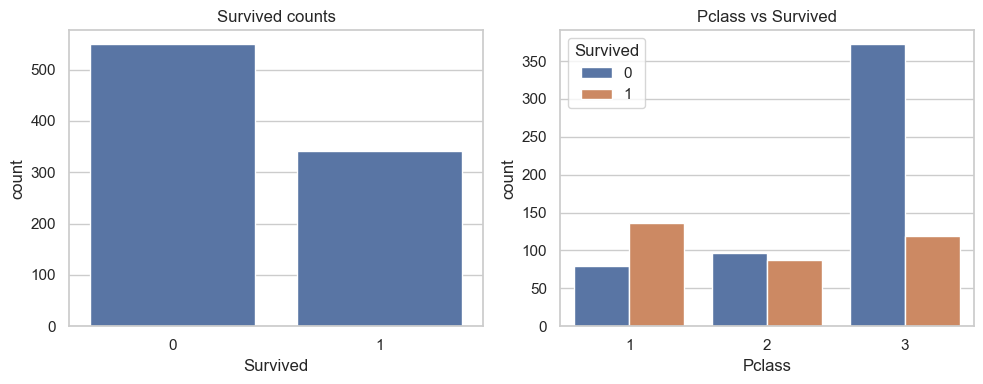

In [6]:
# Basic info
print(train.info())
print('\nMissing values:')
print(train.isna().sum())

display(train.describe(include='all').T)

# Survival rate
print('\nOverall survival rate:')
print(train['Survived'].mean())

# Quick plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='Survived', data=train)
plt.title('Survived counts')

plt.subplot(1,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Pclass vs Survived')
plt.tight_layout()
plt.show()

### More EDA: Age distribution and sex effect

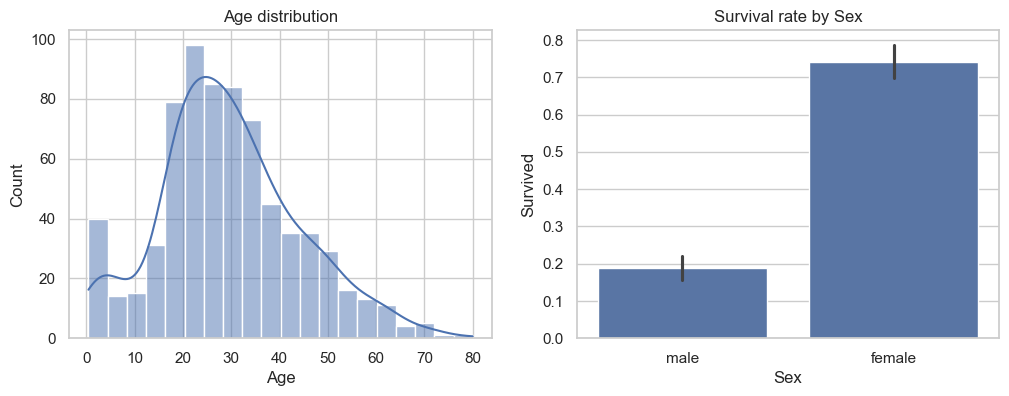

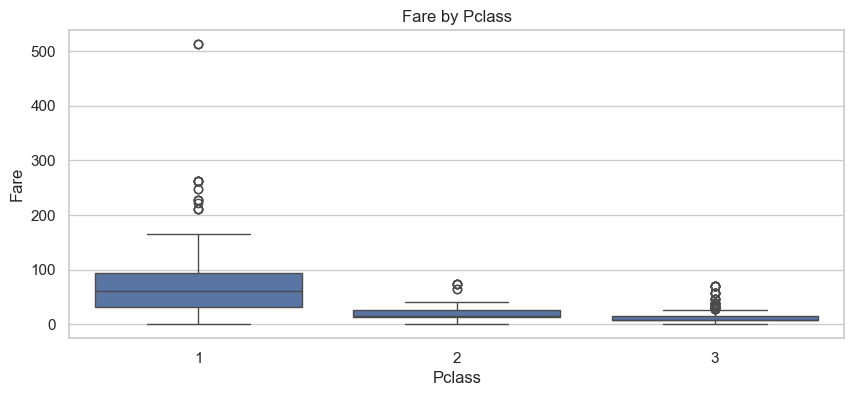

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age distribution')

plt.subplot(1,2,2)
sns.barplot(data=train, x='Sex', y='Survived')
plt.title('Survival rate by Sex')
plt.show()

# Fare and Embarked
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Fare by Pclass')
plt.show()

## 3. Preprocessing
Handle missing values, encode categorical variables, and prepare feature matrix `X` and target `y`. We'll use a simple, interpretable feature set.

In [5]:
# Copy dataframe
df = train.copy()

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Age with median (simple imputation)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin (too many missing), PassengerId, Name, Ticket - these aren't useful for baseline
for c in ['Cabin','PassengerId','Name','Ticket']:
    if c in df.columns:
        df = df.drop(columns=[c])

# Create simple features
# IsAlone
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['IsAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)

# Title extraction from Name not available (we dropped Name) - optional in extended pipeline

# One-hot encode Sex and Embarked
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

# Ensure no missing values remain
print('Missing after simple imputation:')
print(df.isna().sum())

display(df.head())

Missing after simple imputation:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


Survived  Pclass   Age  SibSp  Parch     Fare  IsAlone  Sex_male  \
0         0       3  22.0      1      0   7.2500        0      True   
1         1       1  38.0      1      0  71.2833        0     False   
2         1       3  26.0      0      0   7.9250        1     False   
3         1       1  35.0      1      0  53.1000        0     False   
4         0       3  35.0      0      0   8.0500        1      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True

## 4. Feature selection & train/test split
Select features for the model and split into train/validation sets.

In [6]:
# Choose features (columns left after preprocessing)
features = [c for c in df.columns if c != 'Survived']
print('Features used:', features)

X = df[features]
y = df['Survived']

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train/val shapes:', X_train.shape, X_val.shape)

Features used: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Train/val shapes: (712, 9) (179, 9)


### 4.1 Scale numeric features
Standard scaling helps optimization for logistic regression.

In [7]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val_scaled[numeric_cols] = scaler.transform(X_val[numeric_cols])

print('Scaling applied to numeric columns:', numeric_cols)

Scaling applied to numeric columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'IsAlone']


## 5. Model training: Logistic Regression (baseline)
Fit a logistic regression model and evaluate on the validation set.

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions & metrics
y_pred = model.predict(X_val_scaled)
y_proba = model.predict_proba(X_val_scaled)[:,1]

metrics = {
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1': f1_score(y_val, y_pred),
    'roc_auc': roc_auc_score(y_val, y_proba)
}

print('Validation metrics:')
print(metrics)

print('\nClassification report:')
print(classification_report(y_val, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_val, y_pred))

Validation metrics:
{'accuracy': 0.8044692737430168, 'precision': 0.7833333333333333, 'recall': 0.6811594202898551, 'f1': 0.7286821705426356, 'roc_auc': 0.8508563899868248}

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion matrix:
[[97 13]
 [22 47]]


## 6. ROC Curve & Threshold analysis

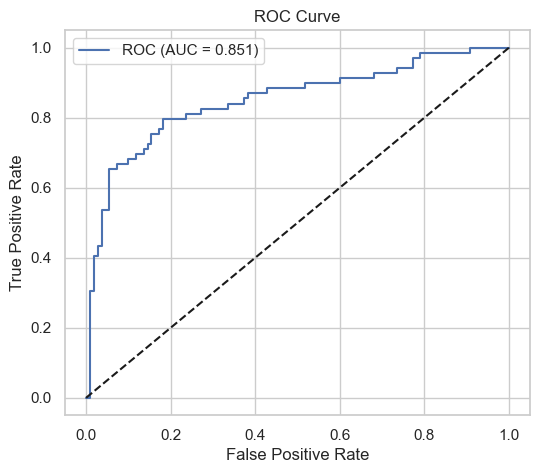

Threshold 0.3: Precision=0.667, Recall=0.812
Threshold 0.4: Precision=0.732, Recall=0.754
Threshold 0.5: Precision=0.783, Recall=0.681
Threshold 0.6: Precision=0.875, Recall=0.609


In [9]:
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {metrics["roc_auc"]:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Example: choose threshold for better recall if desired
for thr in [0.3, 0.4, 0.5, 0.6]:
    y_pred_thr = (y_proba >= thr).astype(int)
    print(f"Threshold {thr}: Precision={precision_score(y_val, y_pred_thr):.3f}, Recall={recall_score(y_val, y_pred_thr):.3f}")

## 7. Interpretation: Coefficients & Feature Importance
Interpret logistic regression coefficients (log-odds -> odds ratio).

In [10]:
coefs = pd.Series(model.coef_[0], index=X_train_scaled.columns).sort_values(key=lambda s: s.abs(), ascending=False)
coef_df = pd.DataFrame({'feature': coefs.index, 'coef': coefs.values, 'odds_ratio': np.exp(coefs.values)})
display(coef_df.head(12))

print('\nTop positive contributors to survival (odds_ratio > 1):')
print(coef_df[coef_df['odds_ratio']>1].sort_values('odds_ratio', ascending=False).head(8))

print('\nTop negative contributors (odds_ratio < 1):')
print(coef_df[coef_df['odds_ratio']<1].sort_values('odds_ratio').head(8))

feature      coef  odds_ratio
0    Sex_male -2.488174    0.083061
1      Pclass -0.877972    0.415625
2         Age -0.481908    0.617604
3       SibSp -0.431123    0.649779
4  Embarked_Q  0.363051    1.437709
5  Embarked_S -0.317138    0.728230
6     IsAlone -0.312079    0.731924
7       Parch -0.172530    0.841533
8        Fare  0.086828    1.090709


Top positive contributors to survival (odds_ratio > 1):
      feature      coef  odds_ratio
4  Embarked_Q  0.363051    1.437709
8        Fare  0.086828    1.090709

Top negative contributors (odds_ratio < 1):
      feature      coef  odds_ratio
0    Sex_male -2.488174    0.083061
1      Pclass -0.877972    0.415625
2         Age -0.481908    0.617604
3       SibSp -0.431123    0.649779
5  Embarked_S -0.317138    0.728230
6     IsAlone -0.312079    0.731924
7       Parch -0.172530    0.841533


## 8. Model tuning (optional): GridSearch for C parameter
We can tune the inverse regularization strength `C` using cross-validation.

In [11]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
clf.fit(X_train_scaled, y_train)
print('Best params:', clf.best_params_)
print('Best CV score:', clf.best_score_)

best_model = clf.best_estimator_
# Evaluate best_model on validation set
y_pred_best = best_model.predict(X_val_scaled)
y_proba_best = best_model.predict_proba(X_val_scaled)[:,1]
print('Validation ROC AUC (best):', roc_auc_score(y_val, y_proba_best))

Best params: {'C': 1}
Best CV score: 0.8565728338769091
Validation ROC AUC (best): 0.8508563899868248


## 9. Export model & preprocessing objects
Save the trained model and scaler so we can deploy them in Streamlit.

In [8]:
import joblib
import os

# Choose your local save directory (you can adjust this path)
save_dir = r"D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression"
os.makedirs(save_dir, exist_ok=True)

# Define file paths
model_path = os.path.join(save_dir, "titanic_logreg_model.pkl")
scaler_path = os.path.join(save_dir, "titanic_scaler.pkl")

# Choose final model (best_model if available)
final_model = best_model if 'best_model' in globals() else model
final_scaler = scaler

# Save model and scaler locally
joblib.dump(final_model, model_path)
joblib.dump(final_scaler, scaler_path)

print(f"‚úÖ Model and scaler saved successfully:\n{model_path}\n{scaler_path}")


RuntimeError: CPU dispatcher tracer already initlized

## 10. Streamlit app (deployment)
Below is a minimal Streamlit app that loads the model and scaler and exposes an input form for prediction. Save this as `streamlit_app.py` and run with `streamlit run streamlit_app.py`. The app shows probability of survival and explanation.

In [7]:
# ---------- streamlit_app.py (drop-in) ----------
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

st.set_page_config(page_title="Titanic Survival Predictor", page_icon="üö¢", layout="centered")

st.title("üö¢ Titanic Survival Predictor")
st.caption("Logistic Regression ‚Ä¢ with scaling + safe feature alignment")

# ====== 1) LOAD ARTIFACTS (model + scaler) ======
ARTIFACT_DIR = r"D:\DATA-SCIENCE\ASSIGNMENTS\7 logistic regression"
MODEL_CANDIDATES  = ["model.pkl", "model.joblib", "logreg_model.pkl", "logreg_model.joblib"]
SCALER_CANDIDATES = ["scaler.pkl", "scaler.joblib", "standard_scaler.pkl", "standard_scaler.joblib"]

def _first_existing(base, names):
    for n in names:
        p = os.path.join(base, n)
        if os.path.exists(p):
            return p
    return None

model_path  = _first_existing(ARTIFACT_DIR, MODEL_CANDIDATES)
scaler_path = _first_existing(ARTIFACT_DIR, SCALER_CANDIDATES)

@st.cache_resource
def load_artifacts(m_path, s_path):
    m = joblib.load(m_path) if m_path else None
    s = joblib.load(s_path) if s_path else None
    return m, s

model, scaler = load_artifacts(model_path, scaler_path) if (model_path and scaler_path) else (None, None)

with st.expander("Artifacts status", expanded=False):
    st.write("Model path:", model_path or "‚ùå Not found")
    st.write("Scaler path:", scaler_path or "‚ùå Not found")

if (model is None) or (scaler is None):
    st.error("Model or scaler not found. Put your files in:\n" + ARTIFACT_DIR)
    st.stop()

# ====== 2) BUILD INPUT UI ======
st.subheader("Enter passenger details")

# Numeric columns you trained on
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Basic UI (adjust defaults as you like)
col1, col2 = st.columns(2)
with col1:
    Pclass = st.selectbox("Passenger Class (1=Upper, 3=Lower)", [1, 2, 3], index=2)
    Age    = st.number_input("Age", min_value=0.0, max_value=100.0, value=28.0, step=1.0)
    SibSp  = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0, step=1)
with col2:
    Parch  = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0, step=1)
    Fare   = st.number_input("Fare", min_value=0.0, max_value=600.0, value=32.2, step=0.1)

# If you one-hot encoded other features (e.g., Sex_female, Embarked_S),
# add controls here and include them in `input_row`. For now, we keep only numeric.
input_row = {
    'Pclass': Pclass,
    'Age': Age,
    'SibSp': SibSp,
    'Parch': Parch,
    'Fare': Fare,
}
input_df = pd.DataFrame([input_row])

st.write("#### Raw input")
st.dataframe(input_df)

# ====== 3) SCALING + PREDICTION BLOCK ======
predict_btn = st.button("Predict Survival")

if predict_btn:
    try:
        # 1) Ensure numeric columns exist
        for c in num_cols:
            if c not in input_df.columns:
                raise KeyError(f"Missing numeric column in input: {c}")

        # 2) Try a straightforward scaling first
        try:
            input_df[num_cols] = scaler.transform(input_df[num_cols])
        except ValueError:
            st.warning("Scaler rejected input shape/order ‚Äî attempting to auto-align features...")
            scaler_cols = getattr(scaler, "feature_names_in_", None)
            if scaler_cols is None:
                scaler_cols = num_cols
            scaler_cols = list(scaler_cols)

            # Add any missing columns (with zeros) so shapes match
            for c in scaler_cols:
                if c not in input_df.columns:
                    input_df[c] = 0

            # Reorder and transform
            input_df[scaler_cols] = scaler.transform(input_df[scaler_cols])
            st.info(f"Used scaler columns: {scaler_cols}")

        # 3) Prepare the final feature set in the exact order model expects (if available)
        model_cols = getattr(model, "feature_names_in_", None)
        if model_cols is not None:
            model_cols = list(model_cols)
            for c in model_cols:
                if c not in input_df.columns:
                    input_df[c] = 0
            input_for_model = input_df[model_cols]
        else:
            # fallback ‚Äî assume our input_df columns are in the correct order
            input_for_model = input_df.copy()

        # 4) Predict
        pred = model.predict(input_for_model)[0]
        proba = None
        if hasattr(model, "predict_proba"):
            proba = float(model.predict_proba(input_for_model)[0][1])

        # 5) Display nicely
        label = "Survived" if pred == 1 else "Did not survive"
        if proba is not None:
            st.success(f"Prediction: **{label}** ‚Äî survival probability: **{proba:.2%}**")
        else:
            st.success(f"Prediction: **{label}**")

        st.write("### Input used for prediction (after scaling / alignment)")
        st.dataframe(input_for_model)

    except KeyError as ke:
        st.error(f"Input error: {ke}")
    except Exception as e:
        st.error("An error occurred during scaling/prediction.")
        st.exception(e)
        # helpful debug info:
        scaler_names = getattr(scaler, "feature_names_in_", None)
        model_names = getattr(model, "feature_names_in_", None)
        st.write("**Debug info:**")
        st.write("- Input columns:", list(input_df.columns))
        st.write("- Scaler.feature_names_in_:", list(scaler_names) if scaler_names is not None else "N/A")
        st.write("- Model.feature_names_in_:", list(model_names) if model_names is not None else "N/A")
# ---------- end file ----------


RuntimeError: CPU dispatcher tracer already initlized

## 11. Final notes
- This notebook provides a clear, reproducible baseline. For production, consider richer feature engineering (Title extraction, Cabin processing, interactions), model ensembles, and robust monitoring.
- To run the Streamlit app locally: `streamlit run streamlit_app.py` after copying `streamlit_app.py`, `titanic_logreg_model.pkl`, and `titanic_scaler.pkl` into the working directory.

 Interview Questions & Answers
1Ô∏è‚É£ What is the difference between Precision and Recall?

Precision and Recall are both evaluation metrics used in classification ‚Äî especially when the class imbalance is real and the model could be lying to us üòÖ

üëâ Precision = Of all the positive predictions the model made, how many were actually correct?
It‚Äôs basically saying:

‚ÄúWhen I said it was positive, was I right?‚Äù

Formula:

Precision
=
ùëá
ùëÉ
ùëá
ùëÉ
+
ùêπ
ùëÉ
Precision=
TP+FP
TP
	‚Äã


(Where TP = True Positives, FP = False Positives)

Use precision when:
‚úÖ False Positives are BAD
Example: Fraud detection (don‚Äôt accuse innocent people) üòÖ

üëâ Recall = Of all actual positive cases, how many did the model catch?
It‚Äôs basically saying:

‚ÄúHow many real positives did I successfully find?‚Äù

Formula:

Recall
=
ùëá
ùëÉ
ùëá
ùëÉ
+
ùêπ
ùëÅ
Recall=
TP+FN
TP
	‚Äã


(Where FN = False Negatives)

Use recall when:
‚úÖ Missing a positive is BAD
Example: Cancer detection (don‚Äôt miss a patient who actually has it)

üî• TL;DR:

Metric	Focus	Danger Avoided
Precision	Accuracy of positive predictions	Don‚Äôt label negatives as positive
Recall	Coverage of actual positives	Don‚Äôt miss real cases

One cares about being correct, the other cares about catching everything.
Together they form F1-score:

ùêπ
1
=
2
‚ãÖ
Precision
‚ãÖ
Recall
Precision
+
Recall
F1=2‚ãÖ
Precision+Recall
Precision‚ãÖRecall
	‚Äã

2Ô∏è‚É£ What is cross-validation, and why is it important in binary classification?

Cross-Validation = Training your model multiple times on different splits of the data
‚Üí to make sure it isn‚Äôt cheating or just memorizing stuff üòå

Most common: K-Fold Cross-Validation

Data is split into K equal parts (e.g., 5 or 10 folds)

Train on K‚àí1 folds

Test on remaining 1 fold

Repeat K times

Take the average score ‚úÖ
‚Üí Stable, reliable model performance üöÄ

Why is it important (especially for binary classification)?

‚úÖ Reduces overfitting
‚úÖ Gives more reliable evaluation on unseen data
‚úÖ Ensures model performance is not ‚Äúluck on one split‚Äù
‚úÖ Very useful when data is imbalanced
‚úÖ Helps optimize models during hyperparameter tuning

üî• TL;DR:

‚ÄúCross-validation gives a fair and realistic performance estimate and helps the model generalize, not hallucinate.‚Äù üòå